In [1]:
from google.colab import drive  # Mount your Google Drive
drive.mount('/content/drive')   # Authorize when prompted
import pandas as pd
import os
import glob
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Search in your entire Google Drive (may take some time)
file_paths = glob.glob('/content/drive/MyDrive/sorted_df_var_*.csv', recursive=True)

# Extract just the filenames
file_names = [os.path.basename(path) for path in file_paths]

# Sort the filenames alphabetically
file_names.sort()

print(type(file_names))

# Print the sorted filenames
for name in file_names:
    print(name)

print(file_names[-1])

csv_path = '/content/drive/MyDrive/' + file_names[-1]

<class 'list'>
sorted_df_var_202506171543.csv
sorted_df_var_202506192121.csv
sorted_df_var_202506192139.csv
sorted_df_var_202506192139.csv


In [3]:
#import glob
#import os
import time # Import time module for ctime

def get_latest_csv_by_mtime(directory_path, file_pattern):
    """
    Finds the most recently modified CSV file matching a pattern in a directory.

    Args:
        directory_path (str): The base directory to search (e.g., '/content/drive/MyDrive/').
        file_pattern (str): The filename pattern (e.g., 'sorted_df_var_*.csv').

    Returns:
        str: The full path to the most recently modified CSV file, or None if no files are found.
    """
    search_path = os.path.join(directory_path, file_pattern)
    file_paths = glob.glob(search_path, recursive=True)

    if not file_paths:
        print(f"No files found matching the pattern: {search_path}")
        return None

    latest_file = None
    latest_mtime = 0  # Initialize with a very old timestamp

    print(f"Searching for files matching: {search_path}")
    print(f"Found {len(file_paths)} potential files.")

    for path in file_paths:
        try:
            # Get modification time (mtime)
            mtime = os.path.getmtime(path)
            if mtime > latest_mtime:
                latest_mtime = mtime
                latest_file = path
        except FileNotFoundError:
            # Handle cases where a file might have been deleted between glob and os.path.getmtime
            print(f"Warning: File not found during mtime check: {path}")
            continue
        except Exception as e:
            print(f"Error processing file {path}: {e}")
            continue

    if latest_file:
        print(f"\nMost recently modified file (by mtime): {os.path.basename(latest_file)}")
        print(f"Modification Time: {time.ctime(latest_mtime)}") # Human-readable time
    else:
        print("Could not determine the latest file.")

    return latest_file

# --- Usage ---
drive_root = '/content/drive/MyDrive/' # Define once for clarity and easy modification
csv_pattern = 'sorted_df_var_*.csv'

# Example usage
latest_csv_path = get_latest_csv_by_mtime(drive_root, csv_pattern)

if latest_csv_path:
    print(f"Path to the latest CSV: {latest_csv_path}")
    # Now you can use latest_csv_path, e.g., to load it with pandas
    # import pandas as pd
    # df = pd.read_csv(latest_csv_path)
else:
    print("No suitable CSV file found to process.")

Searching for files matching: /content/drive/MyDrive/sorted_df_var_*.csv
Found 3 potential files.

Most recently modified file (by mtime): sorted_df_var_202506192139.csv
Modification Time: Thu Jun 19 21:42:01 2025
Path to the latest CSV: /content/drive/MyDrive/sorted_df_var_202506192139.csv


In [4]:
# Search in your entire Google Drive (may take some time)
lstm_file_paths = glob.glob('/content/drive/My Drive/LSTM_DOY/LSTM_results_DOY_grid_search/best_KGE/best_KGE_result_*.csv', recursive=True)

# Extract just the filenames
lstm_file_names = [os.path.basename(path) for path in lstm_file_paths]

# Sort the filenames alphabetically
lstm_file_names.sort()




# Print the sorted filenames
for name in lstm_file_names:
    print(name)

print(lstm_file_names[-1])




lstm_csv_path = '/content/drive/My Drive/LSTM_DOY/LSTM_results_DOY_grid_search/best_KGE/' + lstm_file_names[-1]

best_KGE_result_202506290309.csv
best_KGE_result_202506300437.csv
best_KGE_result_202506301442.csv
best_KGE_result_202506301730.csv
best_KGE_result_202506301730.csv


In [5]:
rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
#print(rf.dtypes)

lstm = pd.read_csv( lstm_csv_path)
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)

print( rf[~rf['site_no'].isin( lstm['model_site']    ) ]  )
#

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [6]:
rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
#print(rf.dtypes)

lstm = pd.read_csv( lstm_csv_path)
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [7]:
merged_df = pd.merge( rf,  lstm #, on='site_no'
                     , left_on='site_no', right_on='model_site'
                     , how='inner')
#merged_df['KGE_y'] = merged_df['KGE_y']#.astype('float64')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)


merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

merged_df = merged_df[ ['site_no', 'KGE_x', 'KGE_y'] ]

merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

print(merged_df.dtypes)
print(merged_df)

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
     site_no  Random Forest   LSTM
0   13310800       0.926769  0.921
1   13192200       0.859797  0.863
2   13311450       0.907758  0.894
3   13311000       0.939221  0.912
4   13154500       0.729285  0.949
5   13092747       0.704597  0.896
6   13211205       0.889599  0.930
7   13311250       0.906752  0.966
8   13317660       0.915618  0.983
9   13310850       0.904339  0.939
10  13296000       0.875657  0.956
11  13150430       0.866316  0.903
12  13307000       0.909612  0.943
13  13341050       0.712652  0.829
14  13342500       0.752785  0.834
15  13190500       0.688853  0.612
16  13340600       0.943870  0.974
17  12305000       0.779612  0.881
18  13304050       0.498039  0.773
19  13340000       0.945548  0.965
20  13176400       0.841286  0.927
21  12322000       0.673606  0.864
22  13213000       0.481536  0.943


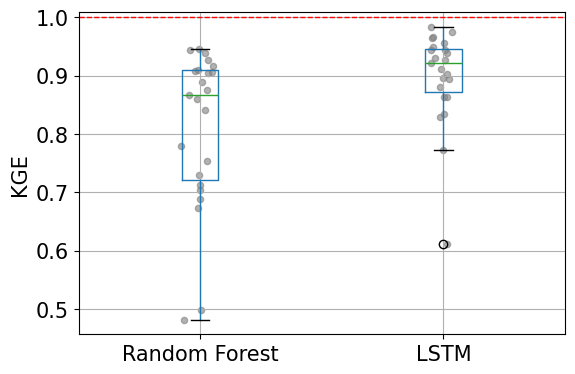

In [8]:
import matplotlib.pyplot as plt
import numpy as np

dpi = 400

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "KGE")
plt.tight_layout()

# Save the figure
plt.savefig("kge.jpg", dpi= dpi)  # Saves as a PNG file

plt.show()

     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

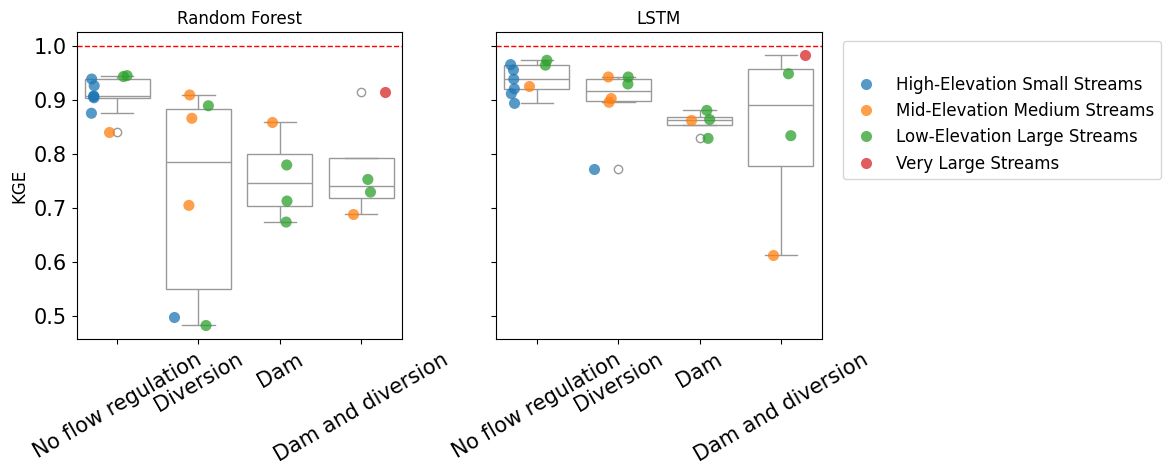

In [9]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print(reg_kmean_pasta)

df = pd.merge( merged_df,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')
print(df)

# Visualization parameters
PLOT_PARAMS = {
    'rotation': 30,
}


ylabel = "KGE"
jpg= 'reg_rf_lstm_kge.jpg'

order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= PLOT_PARAMS['rotation'])   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation=  PLOT_PARAMS['rotation'] )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi= dpi, bbox_inches='tight')

plt.show()

/tmp/ipython-input-10-2054008973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-10-2054008973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].astype('float64')


site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
merged_df_KGE_r_comp      site_no  Random Forest   LSTM
0   13310800       0.945224  0.975
1   13192200       0.937290  0.937
2   13311450       0.958200  0.981
3   13311000       0.945355  0.965
4   13154500       0.835240  0.951
5   13092747       0.832122  0.921
6   13211205       0.957531  0.976
7   13311250       0.959334  0.987
8   13317660       0.972234  0.983
9   13310850       0.923556  0.965
10  13296000       0.957492  0.974
11  13150430       0.884287  0.919
12  13307000       0.935141  0.978
13  13341050       0.769771  0.835
14  13342500       0.771025  0.842
15  13190500       0.880205  0.992
16  13340600       0.958576  0.988
17  12305000       0.790486  0.885
18  13304050       0.852819  0.889
19  13340000       0.967602  0.977
20  13176400       0.888612  0.928
21  12322000       0.787386  0.890
22  13213000       0.533165  0.978


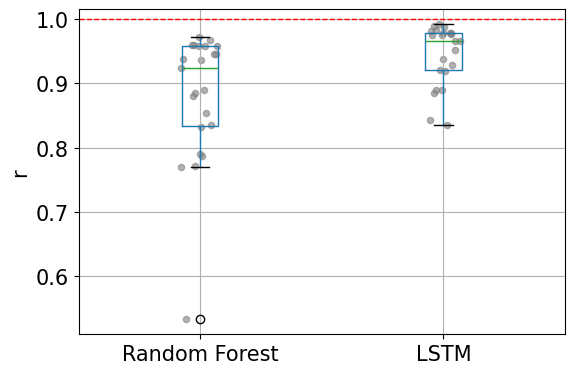

In [10]:
r_merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_r_comp = r_merged_df[ ['site_no', 'grid_correlation', 'KGE_r_comp'] ]

merged_df_KGE_r_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].apply(lambda x: x[1:6])
merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].astype('float64')

print(merged_df_KGE_r_comp.dtypes)

print("merged_df_KGE_r_comp",merged_df_KGE_r_comp)

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_r_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_r_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "r")
plt.tight_layout()

# Save the figure
plt.savefig("kge_r.png")  # Saves as a PNG file

plt.show()

     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

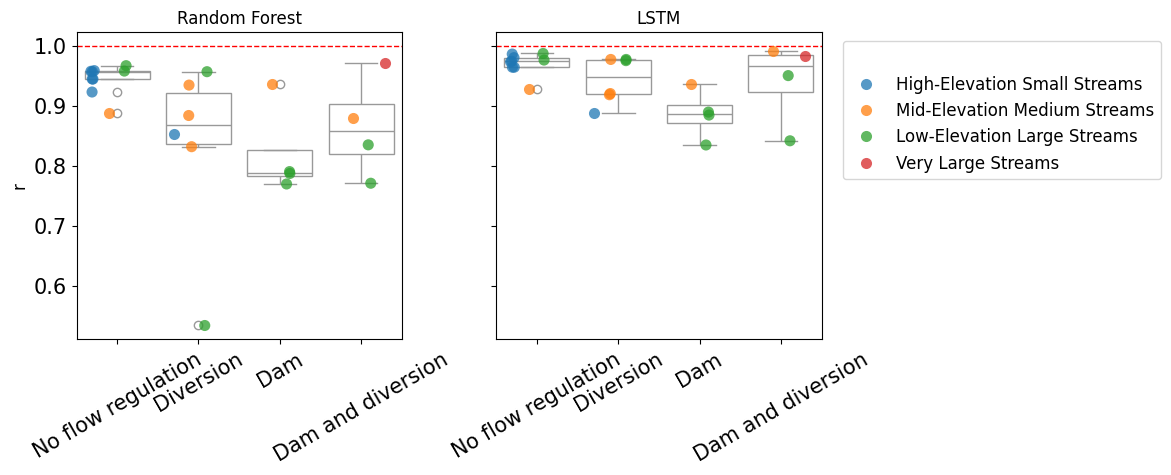

In [11]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print(reg_kmean_pasta)

df = pd.merge( merged_df_KGE_r_comp,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')
print(df)

rotation= 30
ylabel = "r"
jpg= 'reg_rf_lstm_r.jpg'

order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi=400, bbox_inches='tight')

plt.show()

     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

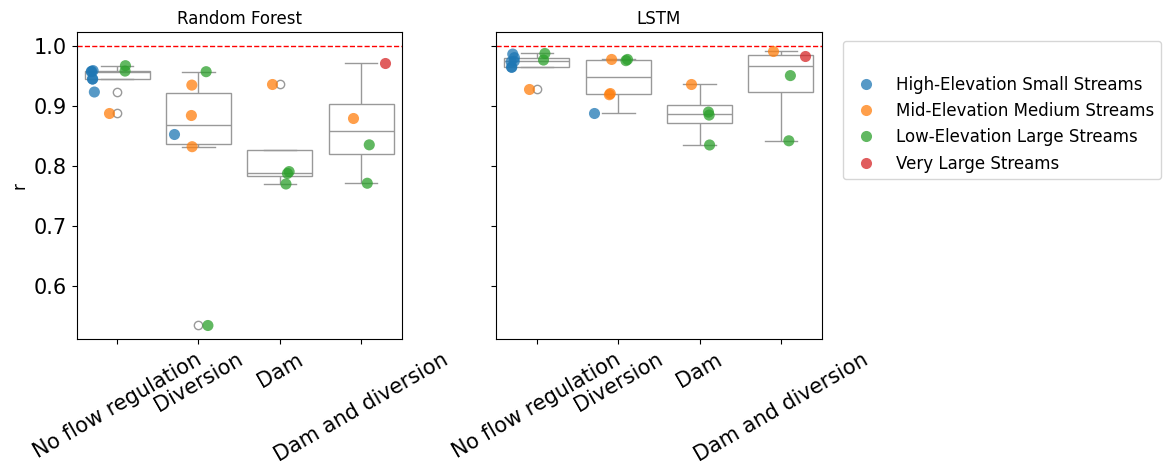

In [12]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print(reg_kmean_pasta)

df = pd.merge( merged_df_KGE_r_comp,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')
print(df)

rotation= 30
ylabel = "r"
jpg= 'reg_rf_lstm_r.jpg'

order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi=400, bbox_inches='tight')

plt.show()

/tmp/ipython-input-13-3820751258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-13-3820751258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].astype('float64')


site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
merged_df_KGE_alpha_comp      site_no  Random Forest   LSTM
0   13310800       0.958528  0.942
1   13192200       1.124802  1.121
2   13311450       0.919909  0.906
3   13311000       1.023751  1.079
4   13154500       0.785208  1.011
5   13092747       0.756972  0.934
6   13211205       0.899286  0.935
7   13311250       0.916090  0.969
8   13317660       0.920348  0.997
9   13310850       1.011385  1.025
10  13296000       0.885029  0.974
11  13150430       0.933781  1.053
12  13307000       0.940798  1.039
13  13341050       0.828321  1.037
14  13342500       0.907092  1.051
15  13190500       0.735846  1.382
16  13340600       0.962469  0.981
17  12305000       0.945540  1.027
18  13304050       0.520205  0.810
19  13340000       0.956238  1.026
20  13176400       0.888845  1.000
21  12322000       0.753826  0.934
22  13213000       0.782647  0.947


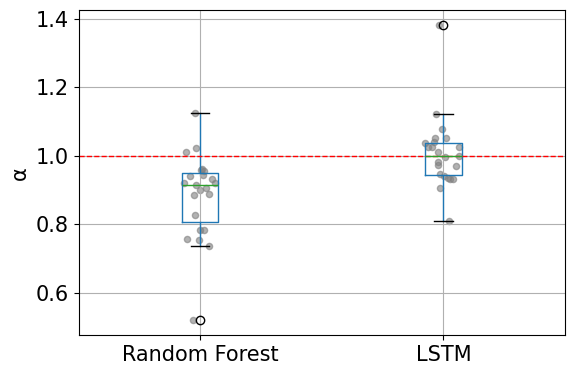

In [13]:
alpha_merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_alpha_comp = alpha_merged_df[ ['site_no', 'KGE_Alpha', 'KGE_alpha_comp'] ]

merged_df_KGE_alpha_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].apply(lambda x: x[1:6])
merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].astype('float64')

print(merged_df_KGE_alpha_comp.dtypes)

print("merged_df_KGE_alpha_comp",merged_df_KGE_alpha_comp)

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_alpha_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_alpha_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "α")
plt.tight_layout()

plt.savefig("kge_ALPHA.png")

plt.show()

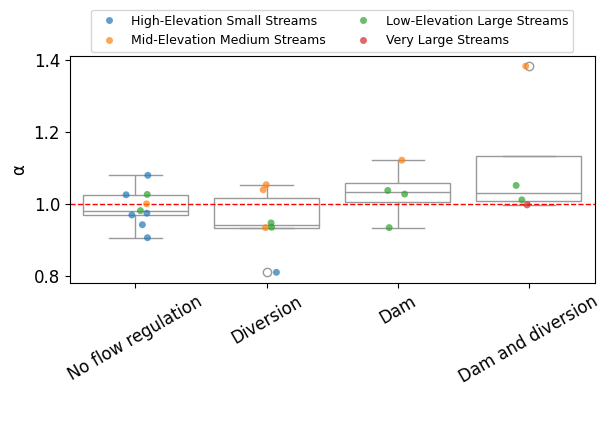

In [14]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
#print(reg_kmean_pasta)

df = pd.merge( merged_df_KGE_alpha_comp,  reg_kmean_pasta,on='site_no'#, left_on='site_no', right_on='site_no'
, how='inner')
#print(df)

x = "dam_and_diversion"
y = "LSTM"
ylabel = "α"
fontsize = 12

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ])

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",
              alpha=0.7, jitter=True)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2, fontsize=  9)

plt.xticks(rotation= 30 , fontsize= fontsize )
plt.yticks(  fontsize= fontsize )

plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
plt.title(" ")

plt.tight_layout()
dpi=500
#plt.savefig('alpha.eps', format='eps', dpi= dpi)
#plt.savefig('alpha.jpg', dpi= dpi)

plt.show()

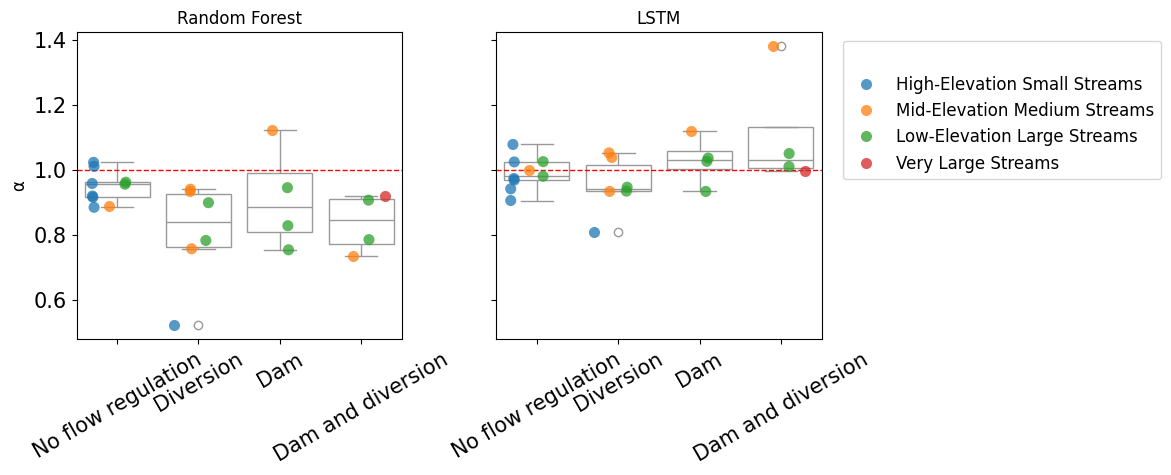

In [15]:
rotation= 30
ylabel = "α"
jpg= 'reg_rf_lstm_alpha.jpg'
order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi=400, bbox_inches='tight')

plt.show()